In [31]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/ev-charging-stations-india.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


In [33]:
correlation=df.corr(numeric_only=True)
correlation


,longitude,type
longitude,1.000000,-0.017713
type,-0.017713,1.000000


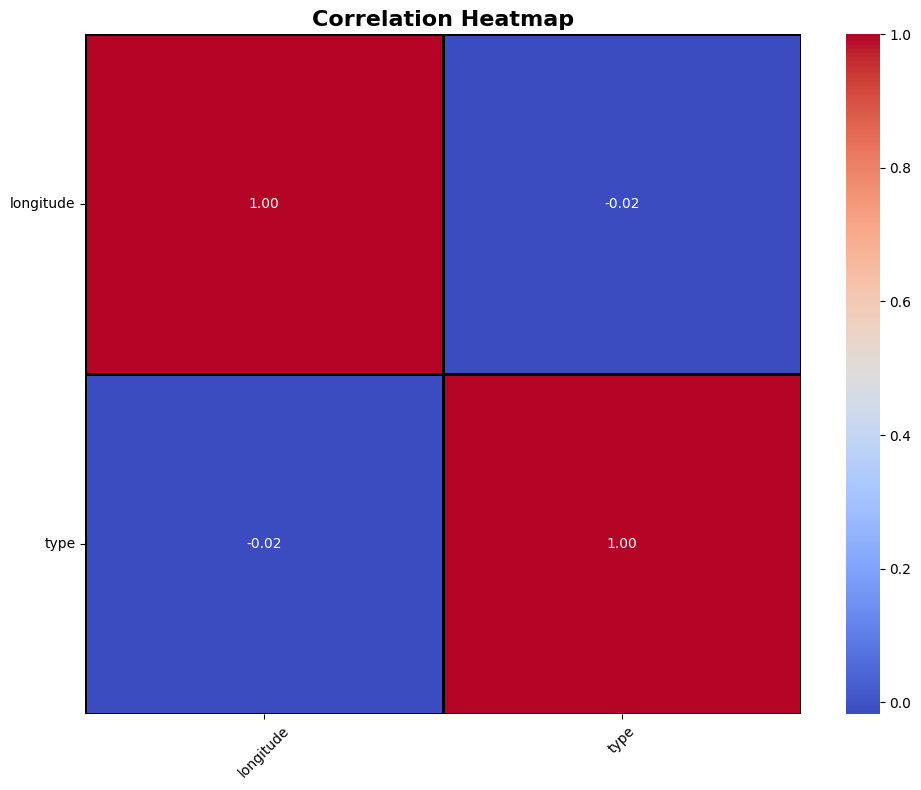

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))

# Customize the colormap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


In [35]:
# Convert the 'lattitude' column to numeric, coercing errors to NaN
df['lattitude'] = pd.to_numeric(df['lattitude'], errors='coerce')

<ipython-input-37-1ce764ff6542>:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


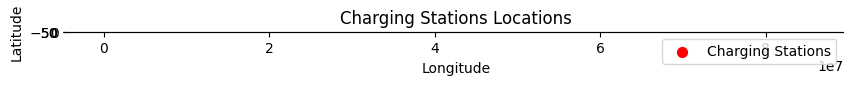

In [37]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Step 1: Fix the typo in the column name
df.rename(columns={'lattitude': 'latitude'}, inplace=True)

# Step 2: Convert the DataFrame to a GeoDataFrame
# Create a geometry column from latitude and longitude
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Step 3: Plot the locations of the charging stations
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=50, color='red', marker='o', label='Charging Stations')
plt.title('Charging Stations Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [7]:
# Convert the 'lattitude' column to numeric, coercing errors to NaN
df['lattitude'] = pd.to_numeric(df['lattitude'], errors='coerce')

# Check for missing values across the dataset
missing_values = df.isnull().sum()

missing_values

,0
name,0
state,0
city,0
address,40
lattitude,8
longitude,6
type,8


In [8]:
df['lattitude']= df['lattitude'].fillna(df['lattitude'].mean())

In [9]:
# Drop rows where 'lattitude' or 'longitude' are missing
#df_cleaned = df.dropna(subset=['lattitude', 'longitude'])

# Fill missing 'type' values with the most common type
most_common_type = df_cleaned['type'].mode()[0]
df_cleaned['type'].fillna(most_common_type, inplace=True)

# Drop rows where 'address' is missing since it might not be critical for analysis
df_cleaned = df_cleaned.dropna(subset=['address'])

# Final check after cleaning
cleaned_info = df_cleaned.info(), df_cleaned.describe(), missing_values, df_cleaned.head()

# Display the cleaned dataset information
cleaned_info


<class 'pandas.core.frame.DataFrame'>
Index: 1499 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1499 non-null   object 
 1   state      1499 non-null   object 
 2   city       1499 non-null   object 
 3   address    1499 non-null   object 
 4   lattitude  1499 non-null   float64
 5   longitude  1499 non-null   float64
 6   type       1499 non-null   float64
dtypes: float64(3), object(4)
memory usage: 93.7+ KB


(None,
          lattitude     longitude         type
 count  1499.000000  1.499000e+03  1499.000000
 mean     19.891881  1.136271e+05     8.939960
 std       6.965532  3.107610e+06     4.150104
 min       8.390198  8.058454e+00     6.000000
 25%      13.033336  7.576905e+01     7.000000
 50%      19.095269  7.721740e+01     7.000000
 75%      26.868217  7.854488e+01    10.000000
 max      77.597289  8.510551e+07    24.000000,
 name          0
 state         0
 city          0
 address      40
 lattitude     8
 longitude     6
 type          8
 dtype: int64,
                                                 name          state      city  \
 0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
 1                       Galleria DC Charging Station        Haryana  Gurugram   
 2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
 3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
 4                  Food 

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Feature Selection
X = df_cleaned[['lattitude', 'longitude', 'city', 'state']]
y = df_cleaned['type']



In [11]:
# One-hot encode categorical variables (city, state)
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[['city', 'state']])

# Combine encoded features with numeric features (lattitude, longitude)
X_combined = np.hstack((X[['lattitude', 'longitude']].values, X_encoded))

X_combined

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[29.6019   , 76.9803   ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [28.4673   , 77.0818   ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [27.8751   , 76.276    ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [28.411072 , 77.040546 ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [32.7064117, 74.8792033,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [12.885716 , 74.843476 ,  0.       , ...,  0.       ,  0.       ,
         0.       ]])

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)



In [13]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.7755555555555556

Classification Report:
               precision    recall  f1-score   support

         6.0       0.97      0.95      0.96        91
         7.0       0.78      0.88      0.83       214
         8.0       0.62      0.74      0.68        34
        10.0       0.20      0.50      0.29         2
        11.0       0.69      0.50      0.58        18
        12.0       0.50      0.25      0.33        24
        13.0       0.67      0.40      0.50        10
        14.0       0.00      0.00      0.00         1
        15.0       0.60      0.43      0.50         7
        16.0       0.45      0.71      0.56         7
        17.0       0.50      0.50      0.50         2
        18.0       1.00      0.75      0.86         8
        19.0       0.86      0.86      0.86         7
        20.0       1.00      0.60      0.75        10
        21.0       0.25      0.33      0.29         3
        22.0       0.00      0.00      0.00         1
        23.0       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.linear_model import LogisticRegression


# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Output results
print("Logistic Regression Accuracy:", accuracy_lr)
print("\nLogistic Regression Classification Report:\n", classification_rep_lr)
print("\nLogistic Regression Confusion Matrix:\n", conf_matrix_lr)


Logistic Regression Accuracy: 0.47555555555555556

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         6.0       0.00      0.00      0.00        91
         7.0       0.48      1.00      0.64       214
         8.0       0.00      0.00      0.00        34
        10.0       0.00      0.00      0.00         2
        11.0       0.00      0.00      0.00        18
        12.0       0.00      0.00      0.00        24
        13.0       0.00      0.00      0.00        10
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         7
        16.0       0.00      0.00      0.00         7
        17.0       0.00      0.00      0.00         2
        18.0       0.00      0.00      0.00         8
        19.0       0.00      0.00      0.00         7
        20.0       0.00      0.00      0.00        10
        21.0       0.00      0.00      0.00         3
        22.0       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

In [15]:
from sklearn.tree import DecisionTreeClassifier


# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Output results
print("Decision Tree Accuracy:", accuracy_dt)
print("\nDecision Tree Classification Report:\n", classification_rep_dt)
print("\nDecision Tree Confusion Matrix:\n", conf_matrix_dt)


Decision Tree Accuracy: 0.7555555555555555

Decision Tree Classification Report:
               precision    recall  f1-score   support

         6.0       0.95      0.91      0.93        91
         7.0       0.78      0.87      0.82       214
         8.0       0.64      0.68      0.66        34
        10.0       0.20      0.50      0.29         2
        11.0       0.73      0.44      0.55        18
        12.0       0.40      0.25      0.31        24
        13.0       0.60      0.30      0.40        10
        14.0       0.00      0.00      0.00         1
        15.0       0.80      0.57      0.67         7
        16.0       0.38      0.71      0.50         7
        17.0       0.50      0.50      0.50         2
        18.0       0.86      0.75      0.80         8
        19.0       0.67      0.86      0.75         7
        20.0       0.86      0.60      0.71        10
        21.0       0.25      0.33      0.29         3
        22.0       0.00      0.00      0.00         1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
